In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, f_classif, SelectKBest

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ACME-HappinessSurvey2020.csv')
data

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [3]:
data.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

Text(0.5, 1.0, 'The number of people for feelings.')

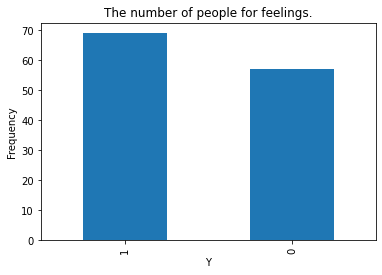

In [4]:
data['Y'].value_counts().plot.bar()
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.title('The number of people for feelings.')

From the bar chart above, it is clear that the number of happy people are higher than unhappy. 

In [5]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Y'], axis=1),
    data['Y'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((88, 6), (38, 6))

Let's use Anova method for important features. 

<AxesSubplot:>

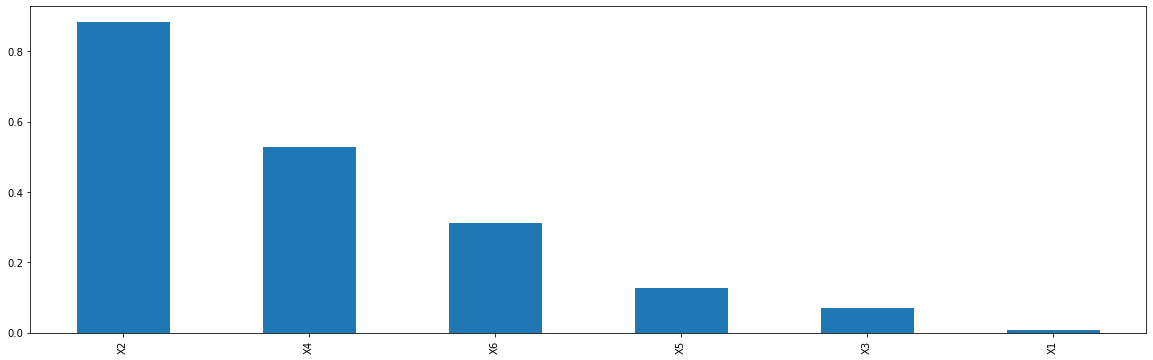

In [6]:
from sklearn.feature_selection import f_classif, f_regression
# univariate anova
univariate = f_regression(X_train.fillna(0), y_train)

# plot values
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20,6))

In [7]:
# select features in top 10th percentile
sel_ = SelectPercentile(f_regression,
                        percentile=50).fit(X_train, y_train)

sel_ = SelectPercentile(f_regression,
                        percentile=50).fit(X_test, y_test)
# display selected feature names
print(X_train.columns[sel_.get_support()])
print(X_test.columns[sel_.get_support()])

Index(['X1', 'X5', 'X6'], dtype='object')
Index(['X1', 'X5', 'X6'], dtype='object')


In [8]:
# select features / discard unwanted features

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)
X_train.shape, X_test.shape

((88, 3), (38, 3))

# Modelling

In [9]:
#linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

     Actual  Predicted
8         0   0.536361
50        1   0.703236
43        0   0.496125
24        1   0.516243
63        0   0.724259
99        0   0.369487
54        1   0.516243
91        1   0.724259
7         1   0.704141
112       0   0.516243
Mean Absolute Error: 0.4677587111515272
Mean Squared Error: 0.24374644180657934
Root Mean Squared Error: 0.4937068379175838


In [19]:
#DecisionTree
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('The DecisionTree score: {}'.format(metrics.roc_auc_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

The DecisionTree score: 0.6204481792717087
[[10 11]
 [ 4 13]]


In [11]:
#AdaBosst
abc = AdaBoostClassifier(n_estimators=50,learning_rate=0.05)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("The AdaBoost score:",metrics.accuracy_score(y_test, y_pred))

The AdaBoost score: 0.5263157894736842


In [18]:
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
# random forest
model3 =RandomForestClassifier(n_estimators=50, random_state=40, max_depth=3)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, trp3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
print('Logistic regression: {}'.format(auc_score1))
print('KNN: {}'.format(auc_score2))
print('Random Forest: {}'.format(auc_score3))

Logistic regression: 0.6848739495798319
KNN: 0.7058823529411764
Random Forest: 0.6820728291316527


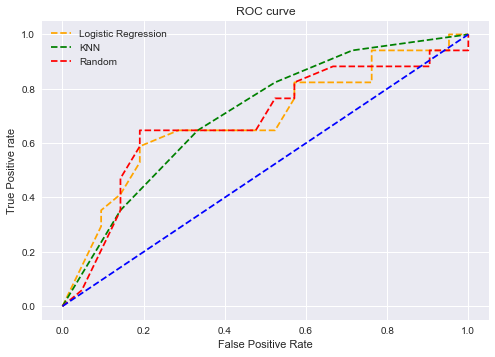

In [14]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, trp3, linestyle='--', color = 'red', label='Random')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Overall

According to the values obtained above, it is clear that the *poorest* models for this dataset is **Linear Regression** . 
Since the value for **AdaBoost** is higher than 0.50, it can be considered as a *good* modelling. However, the number is very close to 0.50. Thus, it is a *poor* model, as well. 
**Decision Tree** modelling, on the other hand, can be considered as a *good* model.
From the graph above, where the roc-auc curves are presented, it is clear that the *best* modelling is **KNN**, while **Logistic Regression** and **Random Forest** models are approximately the same. Nevertheless, **Logistic Regression** is little bit *better* than **Random Forest**.